In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_excel("Bankloan (1).xlsx")

In [4]:
df['default_num'] = np.where(df['default']=='Yes', 1, 0)

In [5]:
df['default_num'].value_counts()

0    371
1    129
Name: default_num, dtype: int64

In [6]:
count_usa = len(df[df['default_num']==0])
count_f_usa = len(df[df['default_num']==1])
pct_usa = count_usa/(count_usa+count_f_usa)
print("Não pagam", pct_usa*100)
pct_f_usa = count_f_usa/(count_usa+count_f_usa)
print("Pagam", pct_f_usa*100)

Não pagam 74.2
Pagam 25.8


In [8]:
X = df.loc[:, ['t_emprego','divida','divida_cc']]
y = df.loc[:, df.columns == 'default_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Sarah Braga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
logreg.decision_function(X_train)

array([-1.85873073, -1.42633095, -2.19796913, -2.29132142, -1.07961157,
       -3.52885952, -1.20258747, -1.0083199 , -1.09081034, -0.84109699,
       -0.69814966,  0.40389985, -1.80021986,  0.16962624, -3.4812608 ,
       -3.37318806, -4.77612953, -0.33744762, -0.23632194, -1.2186494 ,
       -1.6651192 , -3.02480477, -0.67496594, -4.66108843, -2.90830283,
        0.98002812, -0.03639142, -4.06574755, -1.72294763, -3.78799375,
       -2.22691161, -2.36831258, -1.56751436, -0.32697489, -3.65620252,
       -0.68341322, -1.81464011, -0.37473566, -0.58426446, -1.89755966,
       -2.06984964, -1.22603953, -0.5293464 , -3.14108691, -0.63921655,
        1.91321452, -0.95415103, -2.81119031, -2.58201877, -1.31313875,
       -0.43604285, -1.02012922, -2.60899074, -0.55809302, -3.11048955,
       -0.95862709, -2.68793109,  0.71826013, -0.11409649, -2.17216471,
       -0.01799951,  2.04617337, -2.01511025, -0.46340761, -3.81280752,
       -1.21610968,  1.51014199, -3.17898495, -4.5446294 , -0.58

In [11]:
#Valor do intecepto: Beta 0

logreg.intercept_

array([-1.27691889])

In [12]:
# Coeficientes - Betas
logreg.coef_

array([[-0.19923662,  0.07950298,  0.40526946]])

In [13]:
logreg.predict_proba(X_train)

array([[0.86514894, 0.13485106],
       [0.80632899, 0.19367101],
       [0.90006699, 0.09993301],
       [0.90815573, 0.09184427],
       [0.74642047, 0.25357953],
       [0.97149785, 0.02850215],
       [0.76898476, 0.23101524],
       [0.73269122, 0.26730878],
       [0.74853428, 0.25146572],
       [0.6986962 , 0.3013038 ],
       [0.6677774 , 0.3322226 ],
       [0.40037572, 0.59962428],
       [0.8581757 , 0.1418243 ],
       [0.45769483, 0.54230517],
       [0.97014985, 0.02985015],
       [0.96685601, 0.03314399],
       [0.99164189, 0.00835811],
       [0.58357039, 0.41642961],
       [0.55880705, 0.44119295],
       [0.77182578, 0.22817422],
       [0.840924  , 0.159076  ],
       [0.95368223, 0.04631777],
       [0.66261422, 0.33738578],
       [0.99063242, 0.00936758],
       [0.94825535, 0.05174465],
       [0.2728862 , 0.7271138 ],
       [0.50909685, 0.49090315],
       [0.98313901, 0.01686099],
       [0.84850812, 0.15149188],
       [0.97786029, 0.02213971],
       [0.

In [14]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.463521
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.181     
Dependent Variable: default_num      AIC:              284.1127  
Date:               2021-05-24 10:44 BIC:              295.2240  
No. Observations:   300              Log-Likelihood:   -139.06   
Df Model:           2                LL-Null:          -169.79   
Df Residuals:       297              LLR p-value:      4.4917e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
t_emprego     -0.2647    0.0341  -7.7671  0.0000  -0.3315  -0.1979
divida         0.0012    0.0173   0.0686  0.9453  -0.0328   0.

In [15]:
y_pred = logreg.predict(X_train)
print('Acuracia do modelo do conjunto de Treino: {:.3f}'.format(logreg.score(X_train, y_train)))

Acuracia do modelo do conjunto de Treino: 0.807


In [16]:
y_train['default_pred'] = y_pred

C:\Users\Sarah Braga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
pd.crosstab(y_train['default_num'], y_train['default_num'], rownames=['Estado'], colnames=['Previsto'], margins=True, margins_name='Total')

Previsto,0,1,Total
Estado,,,
0,224,0,224
1,0,76,76
Total,224,76,300


In [18]:
y_pred = logreg.predict(X_test)
print('Acuracia do modelo do conjunto de Teste: {:.3f}'.format(logreg.score(X_test, y_test)))

Acuracia do modelo do conjunto de Teste: 0.850


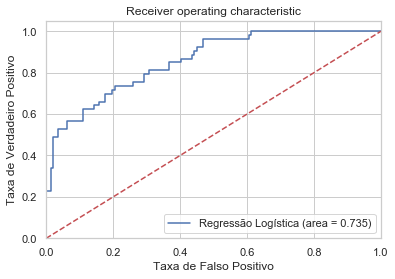

In [19]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()